In [200]:
#Glass

In [201]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid',palette='viridis')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [202]:
#Read The Dataset
df = pd.read_csv('https://raw.githubusercontent.com/KJanhavi2424/My-Datasets/main/glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [203]:
#Describe the Data
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [204]:
#Missing Value Imputation
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [205]:
df.loc[:,'Na':'Si'] = df.loc[:,'Na':'Si'].replace(0,np.nan)

In [206]:
df.isna().sum()

RI       0
Na       0
Mg      42
Al       0
Si       0
K        0
Ca       0
Ba       0
Fe       0
Type     0
dtype: int64

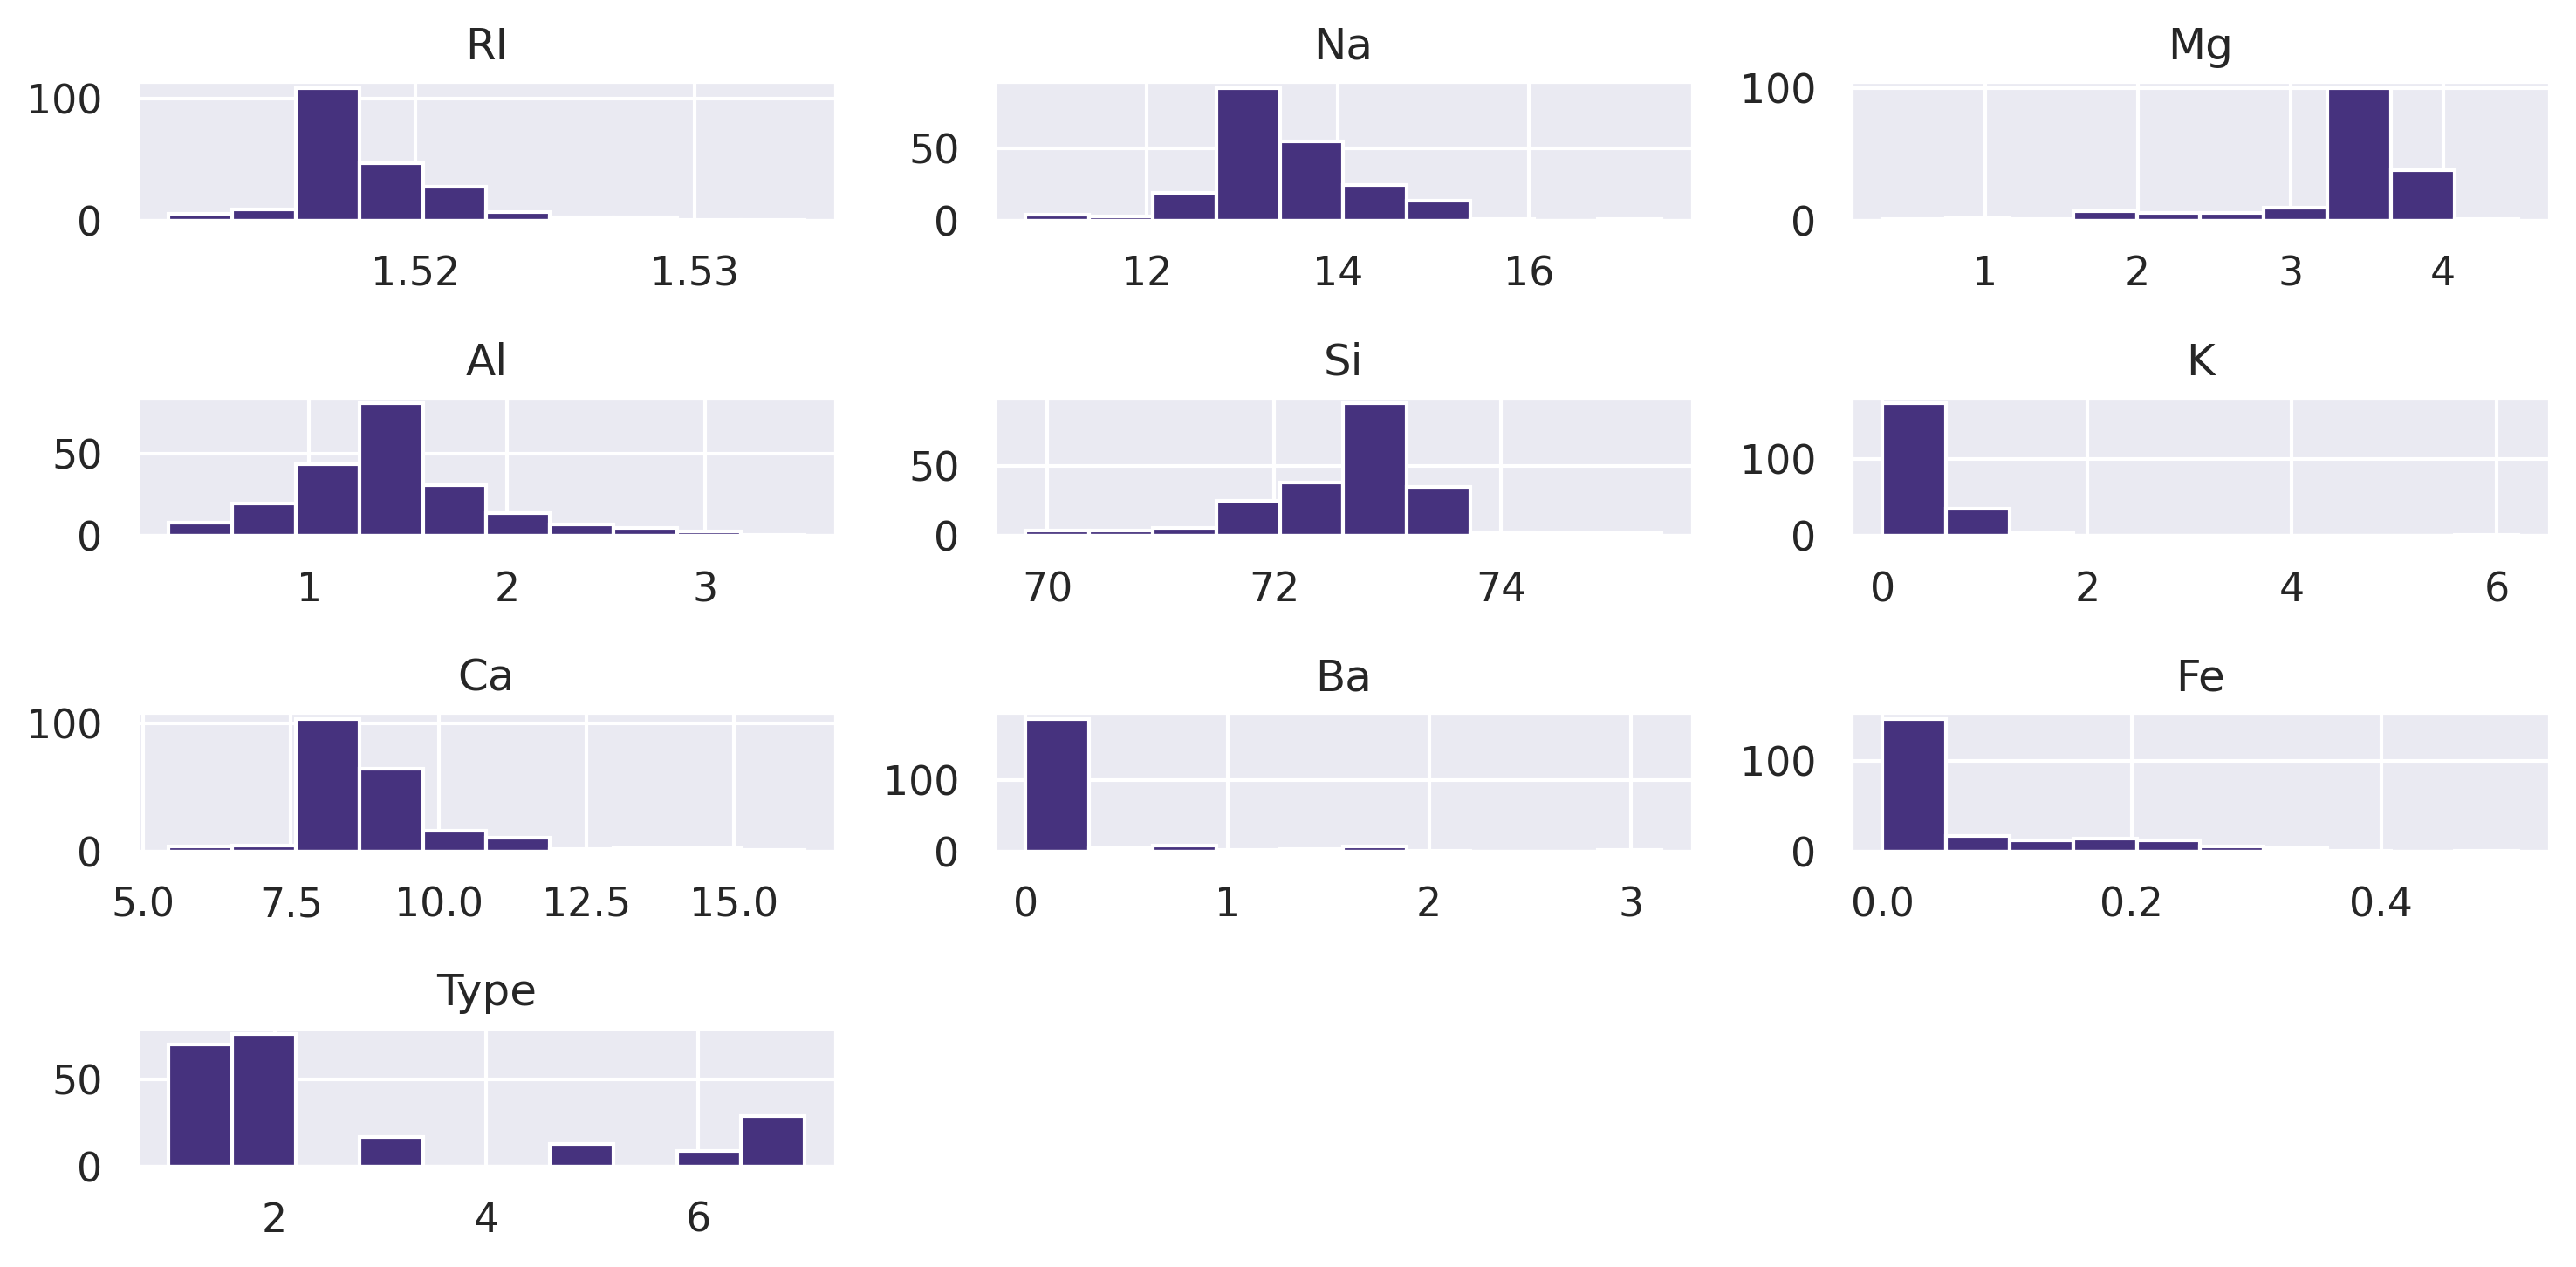

In [207]:
df.hist()
plt.tight_layout()

In [208]:
si = SimpleImputer(strategy='median')

In [209]:
df.loc[:,"Na":'Si'] = si.fit_transform(df.loc[:,"Na":'Si'])

<Axes: >

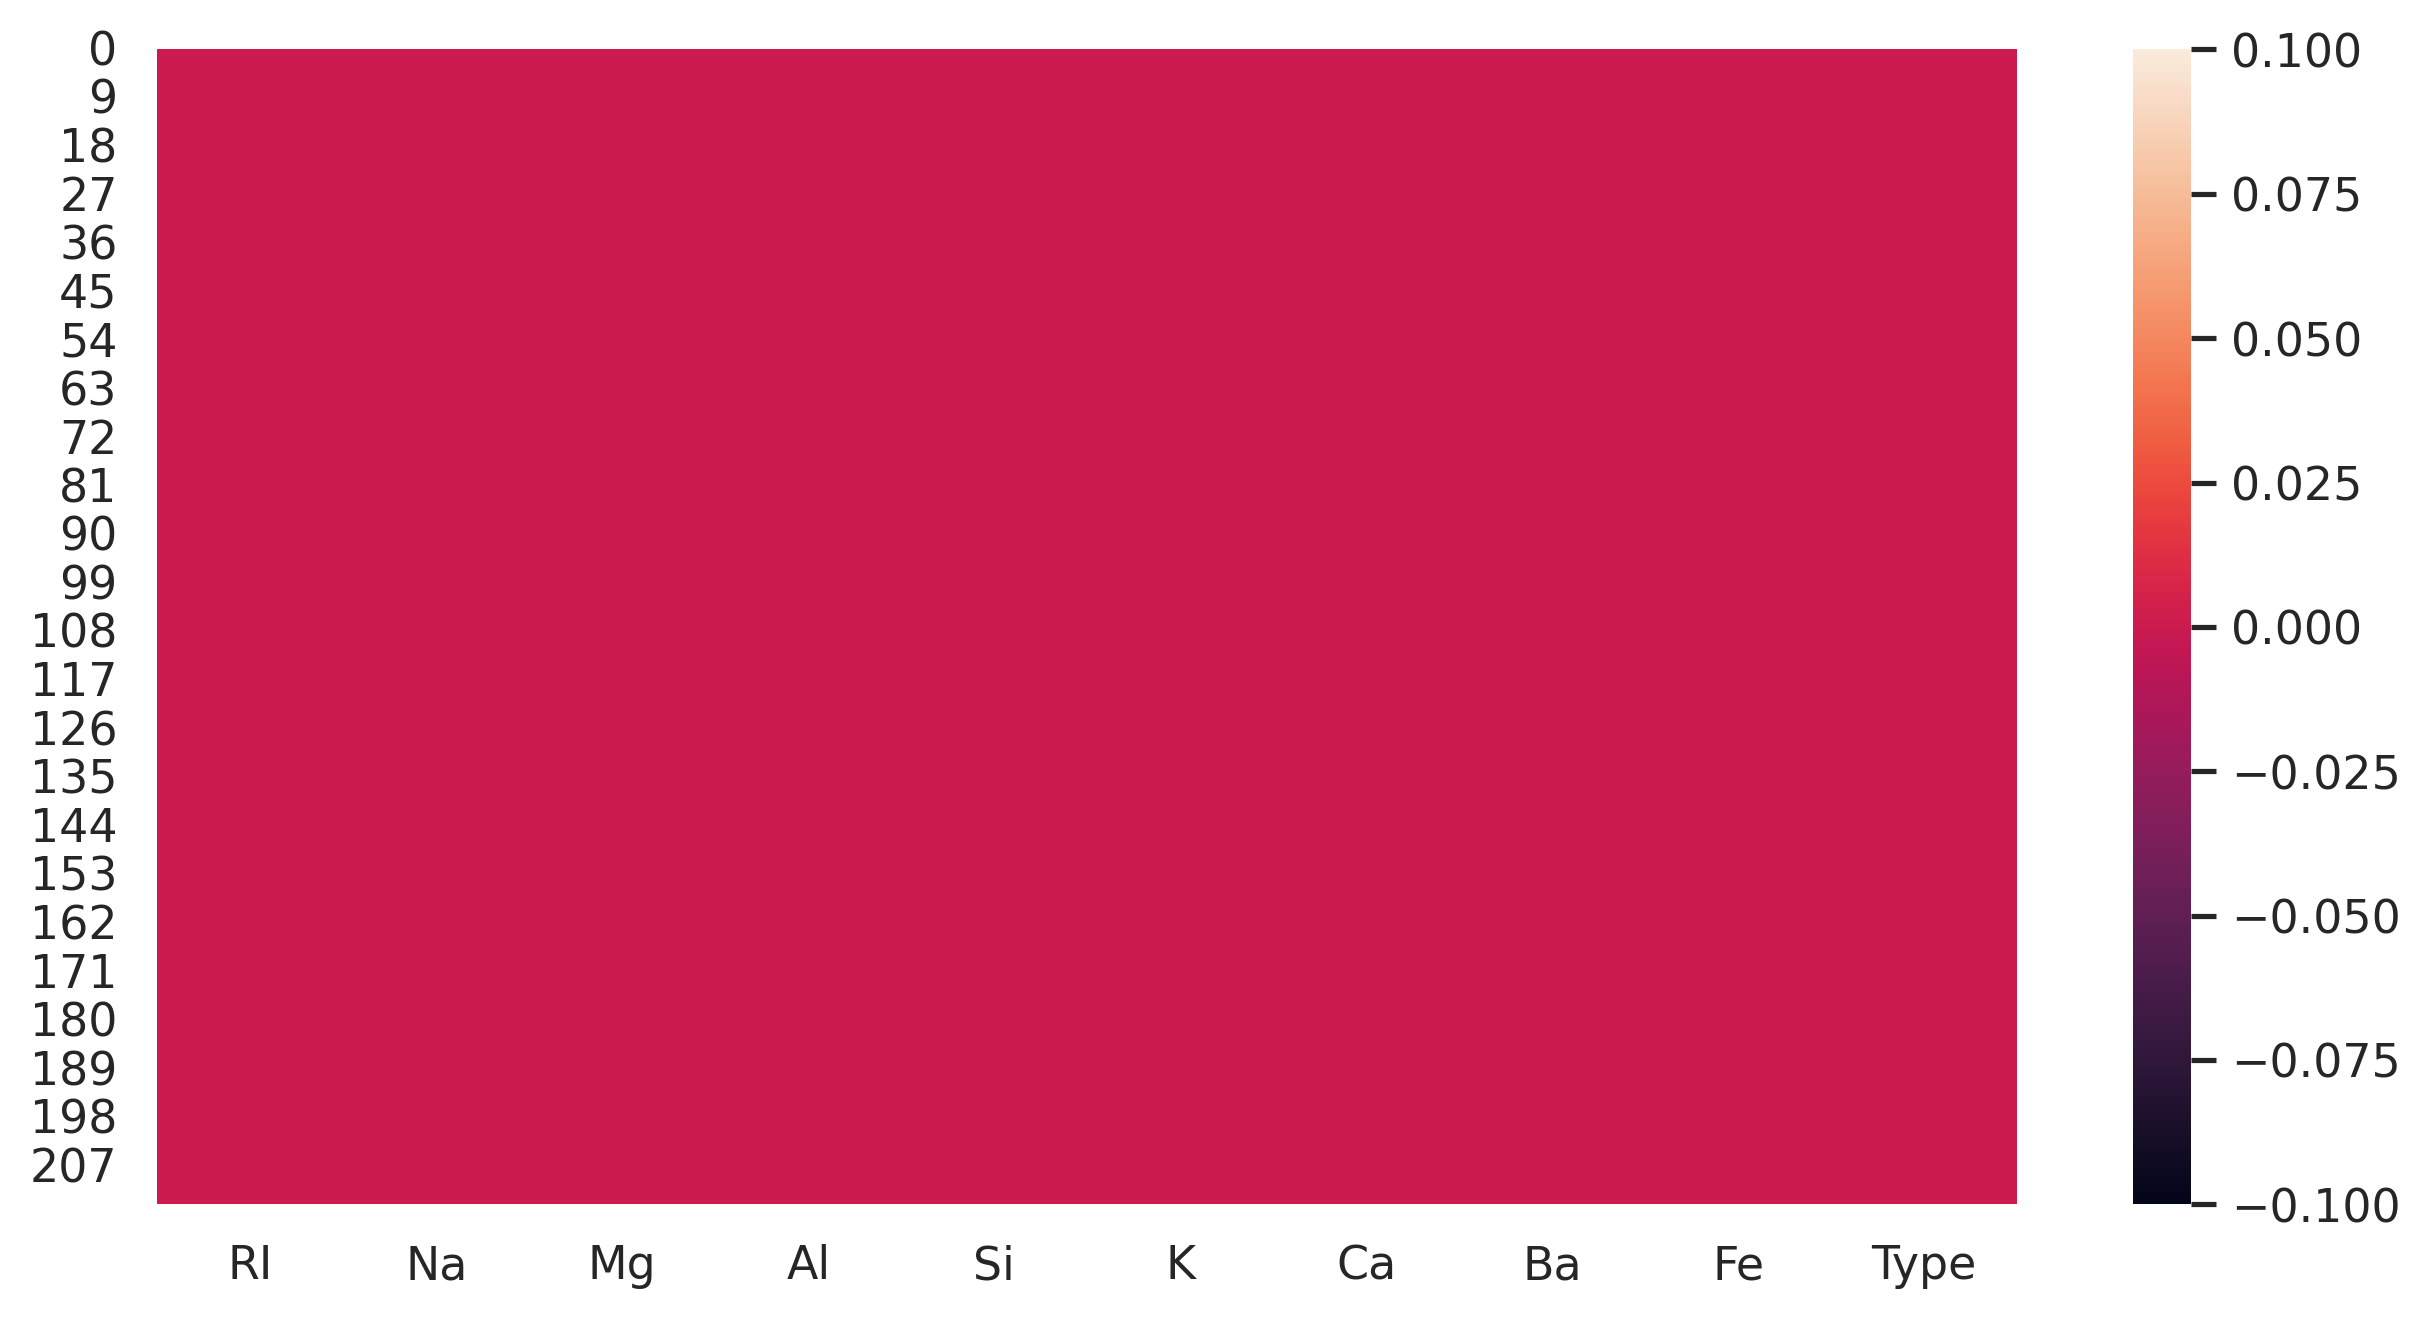

In [210]:
sns.heatmap(df.isna())

In [211]:
#Model Building

In [212]:
x = df.iloc[:,:-1]
y = df['Type']

In [213]:
#Feature Scaling

In [214]:
sc = StandardScaler()

In [215]:
x = sc.fit_transform(x)
x

array([[ 0.87286765,  0.28495326,  1.9743683 , ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.39371178, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.30491085, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135,  0.27827057, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046,  0.27827057, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211,  0.27827057, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [216]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [217]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)
ypred

array([1, 7, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 7,
       2, 1, 1, 3, 2, 2, 2, 1, 5, 6, 1, 1, 1, 1, 1, 2, 2, 1, 1, 7, 7])

In [218]:
knn.score(xtrain,ytrain),knn.score(xtest,ytest)

(0.8304093567251462, 0.6976744186046512)

In [219]:
#Hyperparameter Tunning for knn

In [220]:
trainac = []
testac = []

for i in range(1,25):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(xtrain,ytrain)
  trainac.append(knn.score(xtrain,ytrain))
  testac.append(knn.score(xtest,ytest))

In [221]:
trainac

[1.0,
 0.8654970760233918,
 0.8304093567251462,
 0.7894736842105263,
 0.7953216374269005,
 0.7543859649122807,
 0.7251461988304093,
 0.7192982456140351,
 0.695906432748538,
 0.695906432748538,
 0.6783625730994152,
 0.6608187134502924,
 0.6549707602339181,
 0.6491228070175439,
 0.6374269005847953,
 0.6491228070175439,
 0.6257309941520468,
 0.6432748538011696,
 0.631578947368421,
 0.631578947368421,
 0.6257309941520468,
 0.6140350877192983,
 0.6257309941520468,
 0.6081871345029239]

In [222]:
testac

[0.7674418604651163,
 0.7209302325581395,
 0.6976744186046512,
 0.6744186046511628,
 0.6744186046511628,
 0.6976744186046512,
 0.6976744186046512,
 0.6976744186046512,
 0.6976744186046512,
 0.6744186046511628,
 0.6744186046511628,
 0.6744186046511628,
 0.6511627906976745,
 0.627906976744186,
 0.6744186046511628,
 0.6976744186046512,
 0.6744186046511628,
 0.6744186046511628,
 0.6511627906976745,
 0.6511627906976745,
 0.6511627906976745,
 0.6046511627906976,
 0.6511627906976745,
 0.6511627906976745]

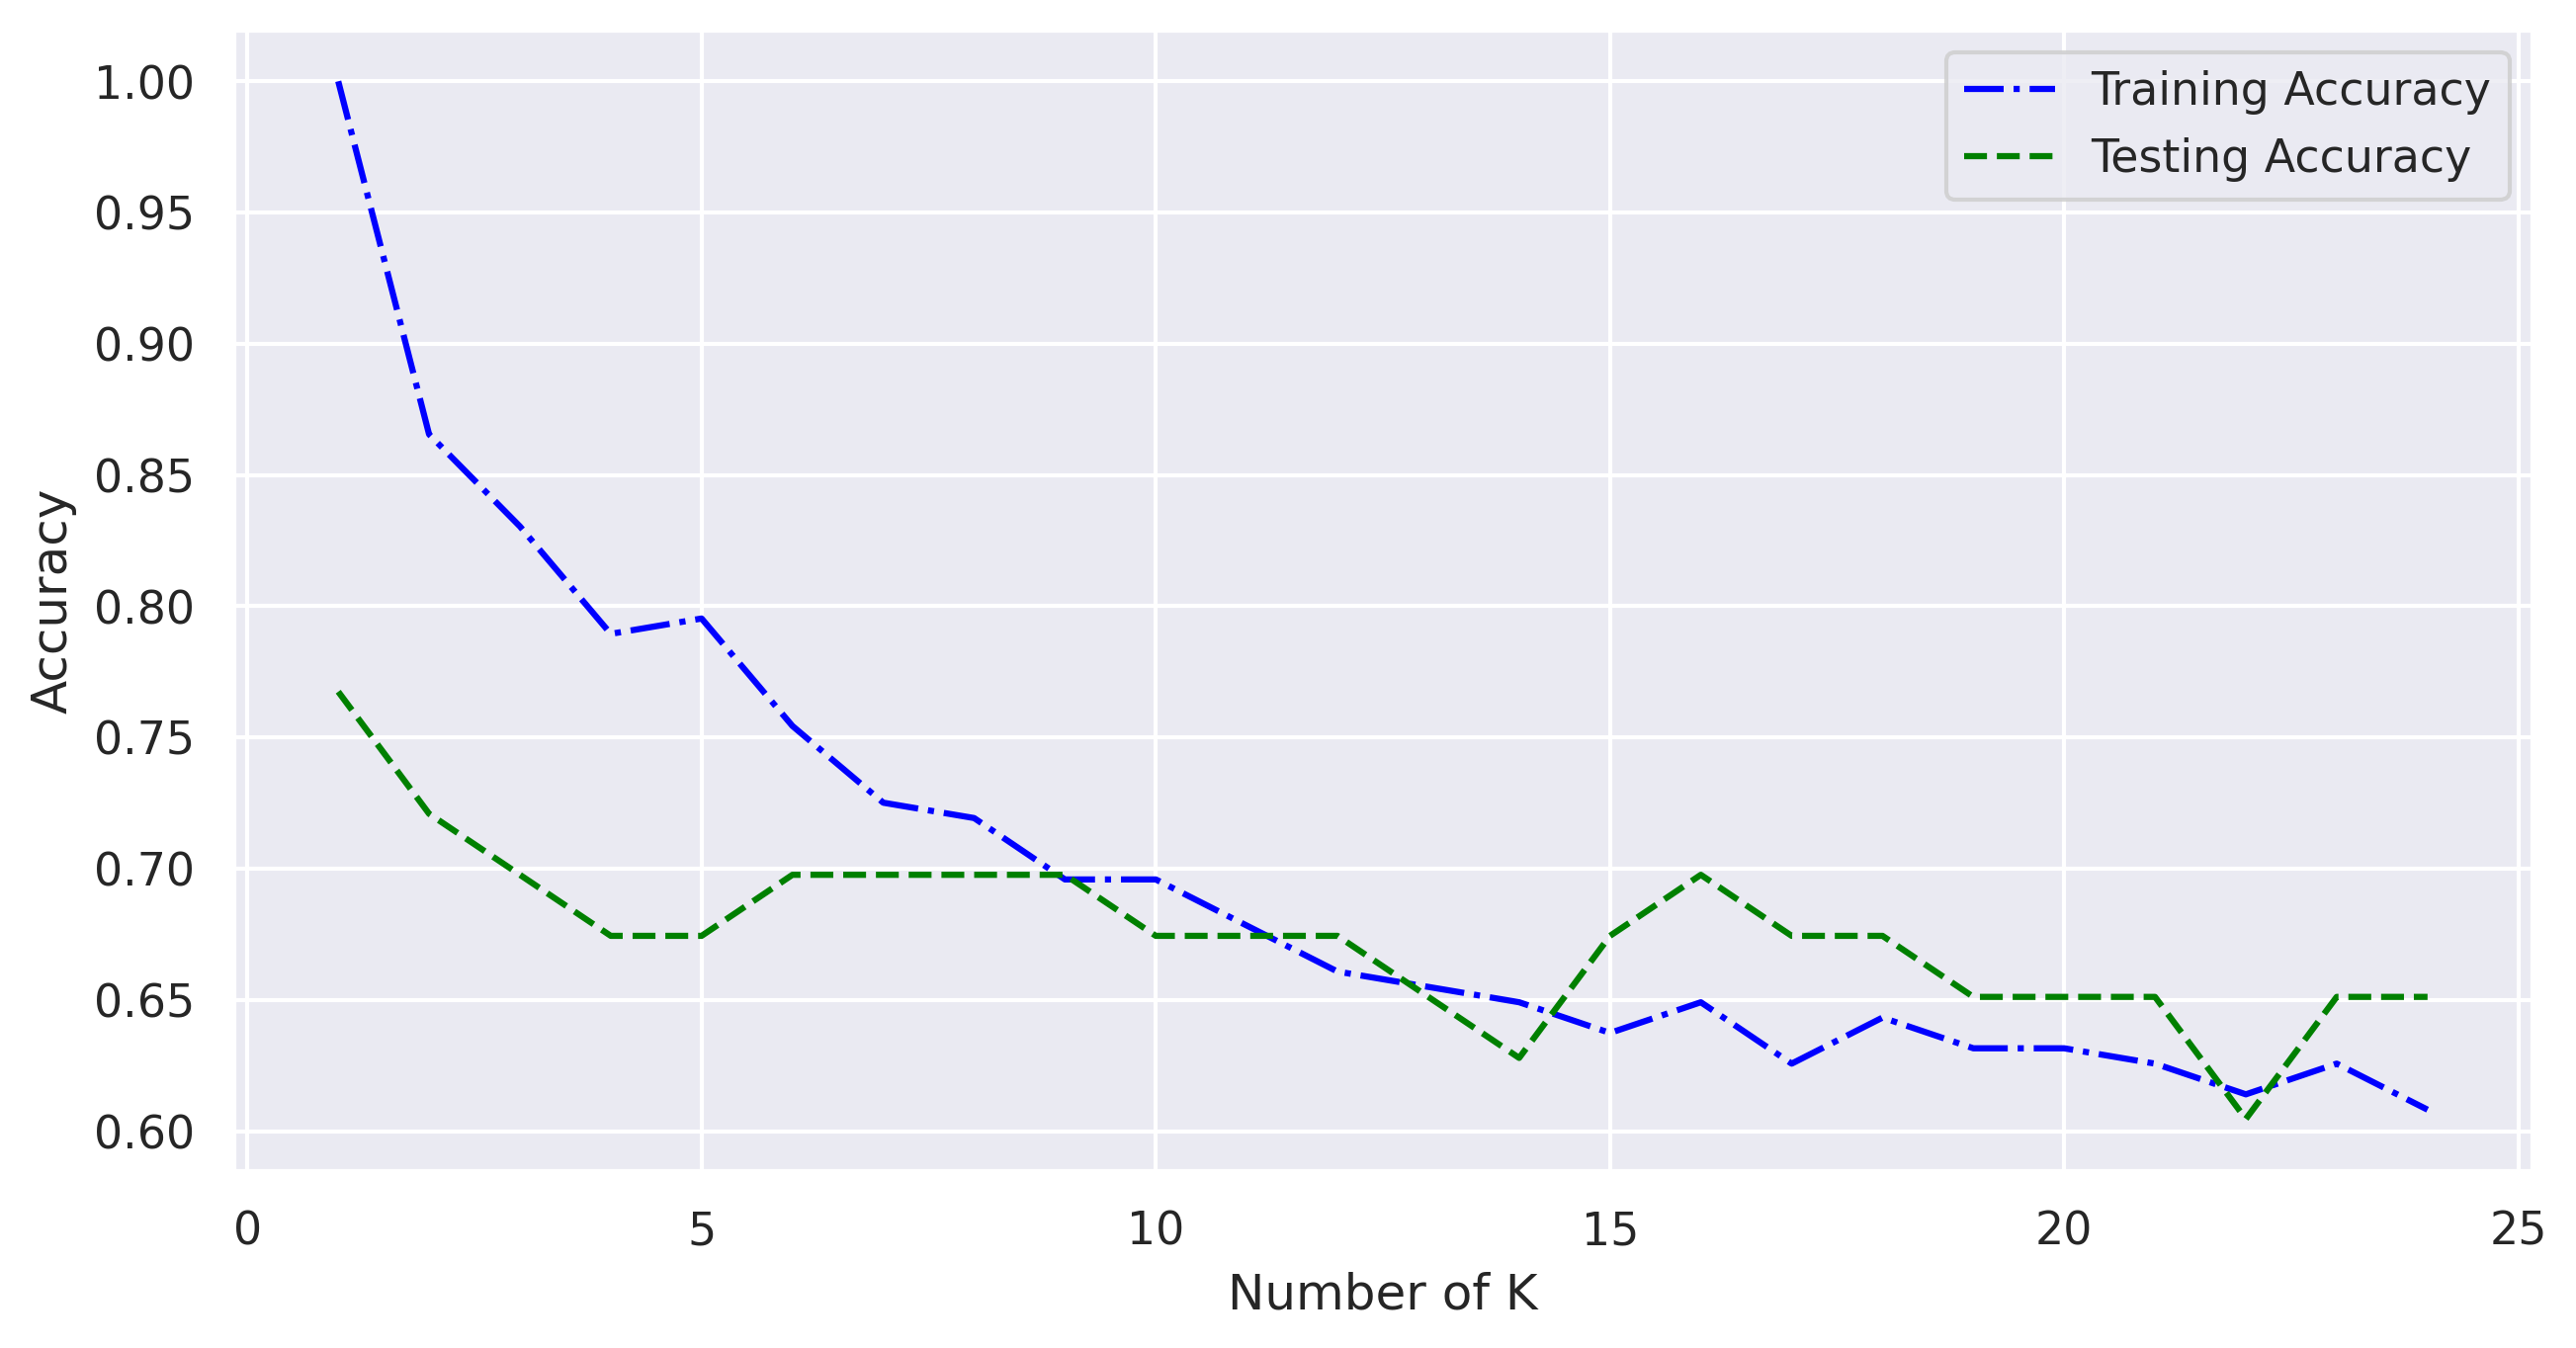

In [223]:
plt.plot(range(1,25),trainac, linestyle = '-.',color = 'blue',label = 'Training Accuracy')
plt.plot(range(1,25),testac, linestyle = '--',color = 'green',label = 'Testing Accuracy')
plt.xlabel('Number of K')
plt.ylabel('Accuracy')
plt.legend()

In [224]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(xtrain,ytrain)
knn.score(xtrain,ytrain),knn.score(xtest,ytest)

(0.6783625730994152, 0.6744186046511628)

In [225]:
#Zoo

In [226]:
#Read The Dataset
df2 = pd.read_csv('https://raw.githubusercontent.com/KJanhavi2424/My-Datasets/main/Zoo.csv')
df2

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [227]:
#Describe the Data
df2.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [228]:
#Missing Value Imputation
df2.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [229]:
df2.loc[:,'predator':'type'] = df2.loc[:,'predator':'type'].replace(0,np.nan)

In [230]:
df2.isna().sum()

animal name     0
hair            0
feathers        0
eggs            0
milk            0
airborne        0
aquatic         0
predator       45
toothed        40
backbone       18
breathes       21
venomous       93
fins           84
legs           23
tail           26
domestic       88
catsize        57
type            0
dtype: int64

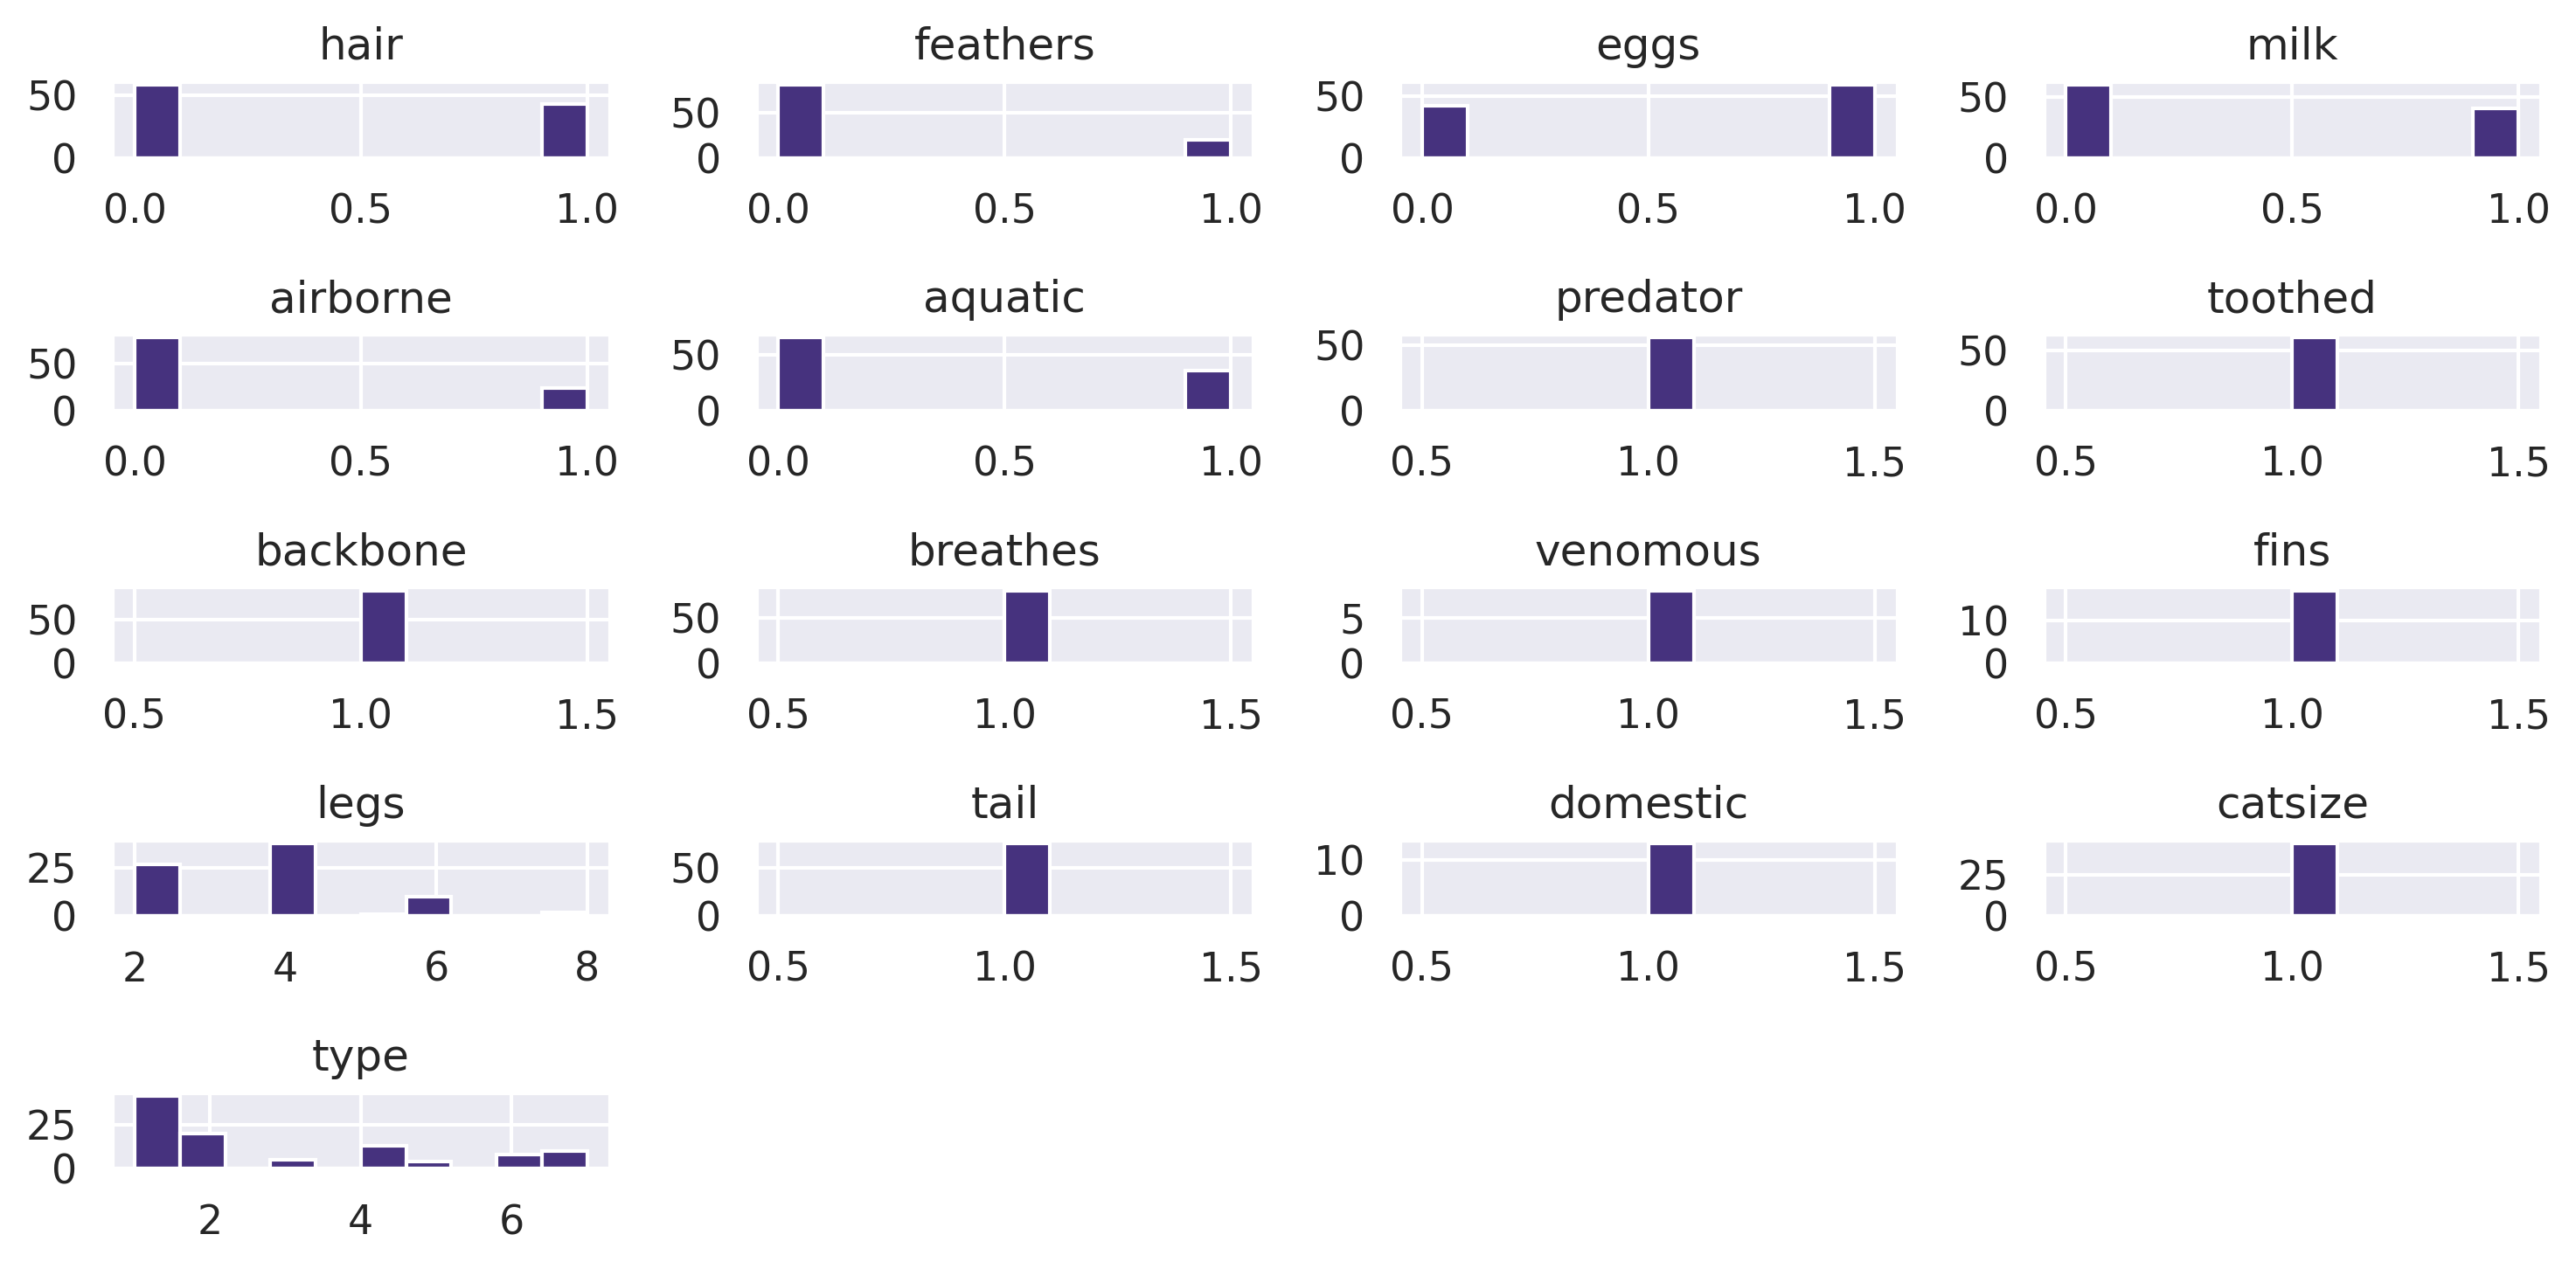

In [231]:
df2.hist()
plt.tight_layout()

In [232]:
si = SimpleImputer(strategy='median')

In [233]:
df2.loc[:,"predator":'type'] = si.fit_transform(df2.loc[:,"predator":'type'])

<Axes: >

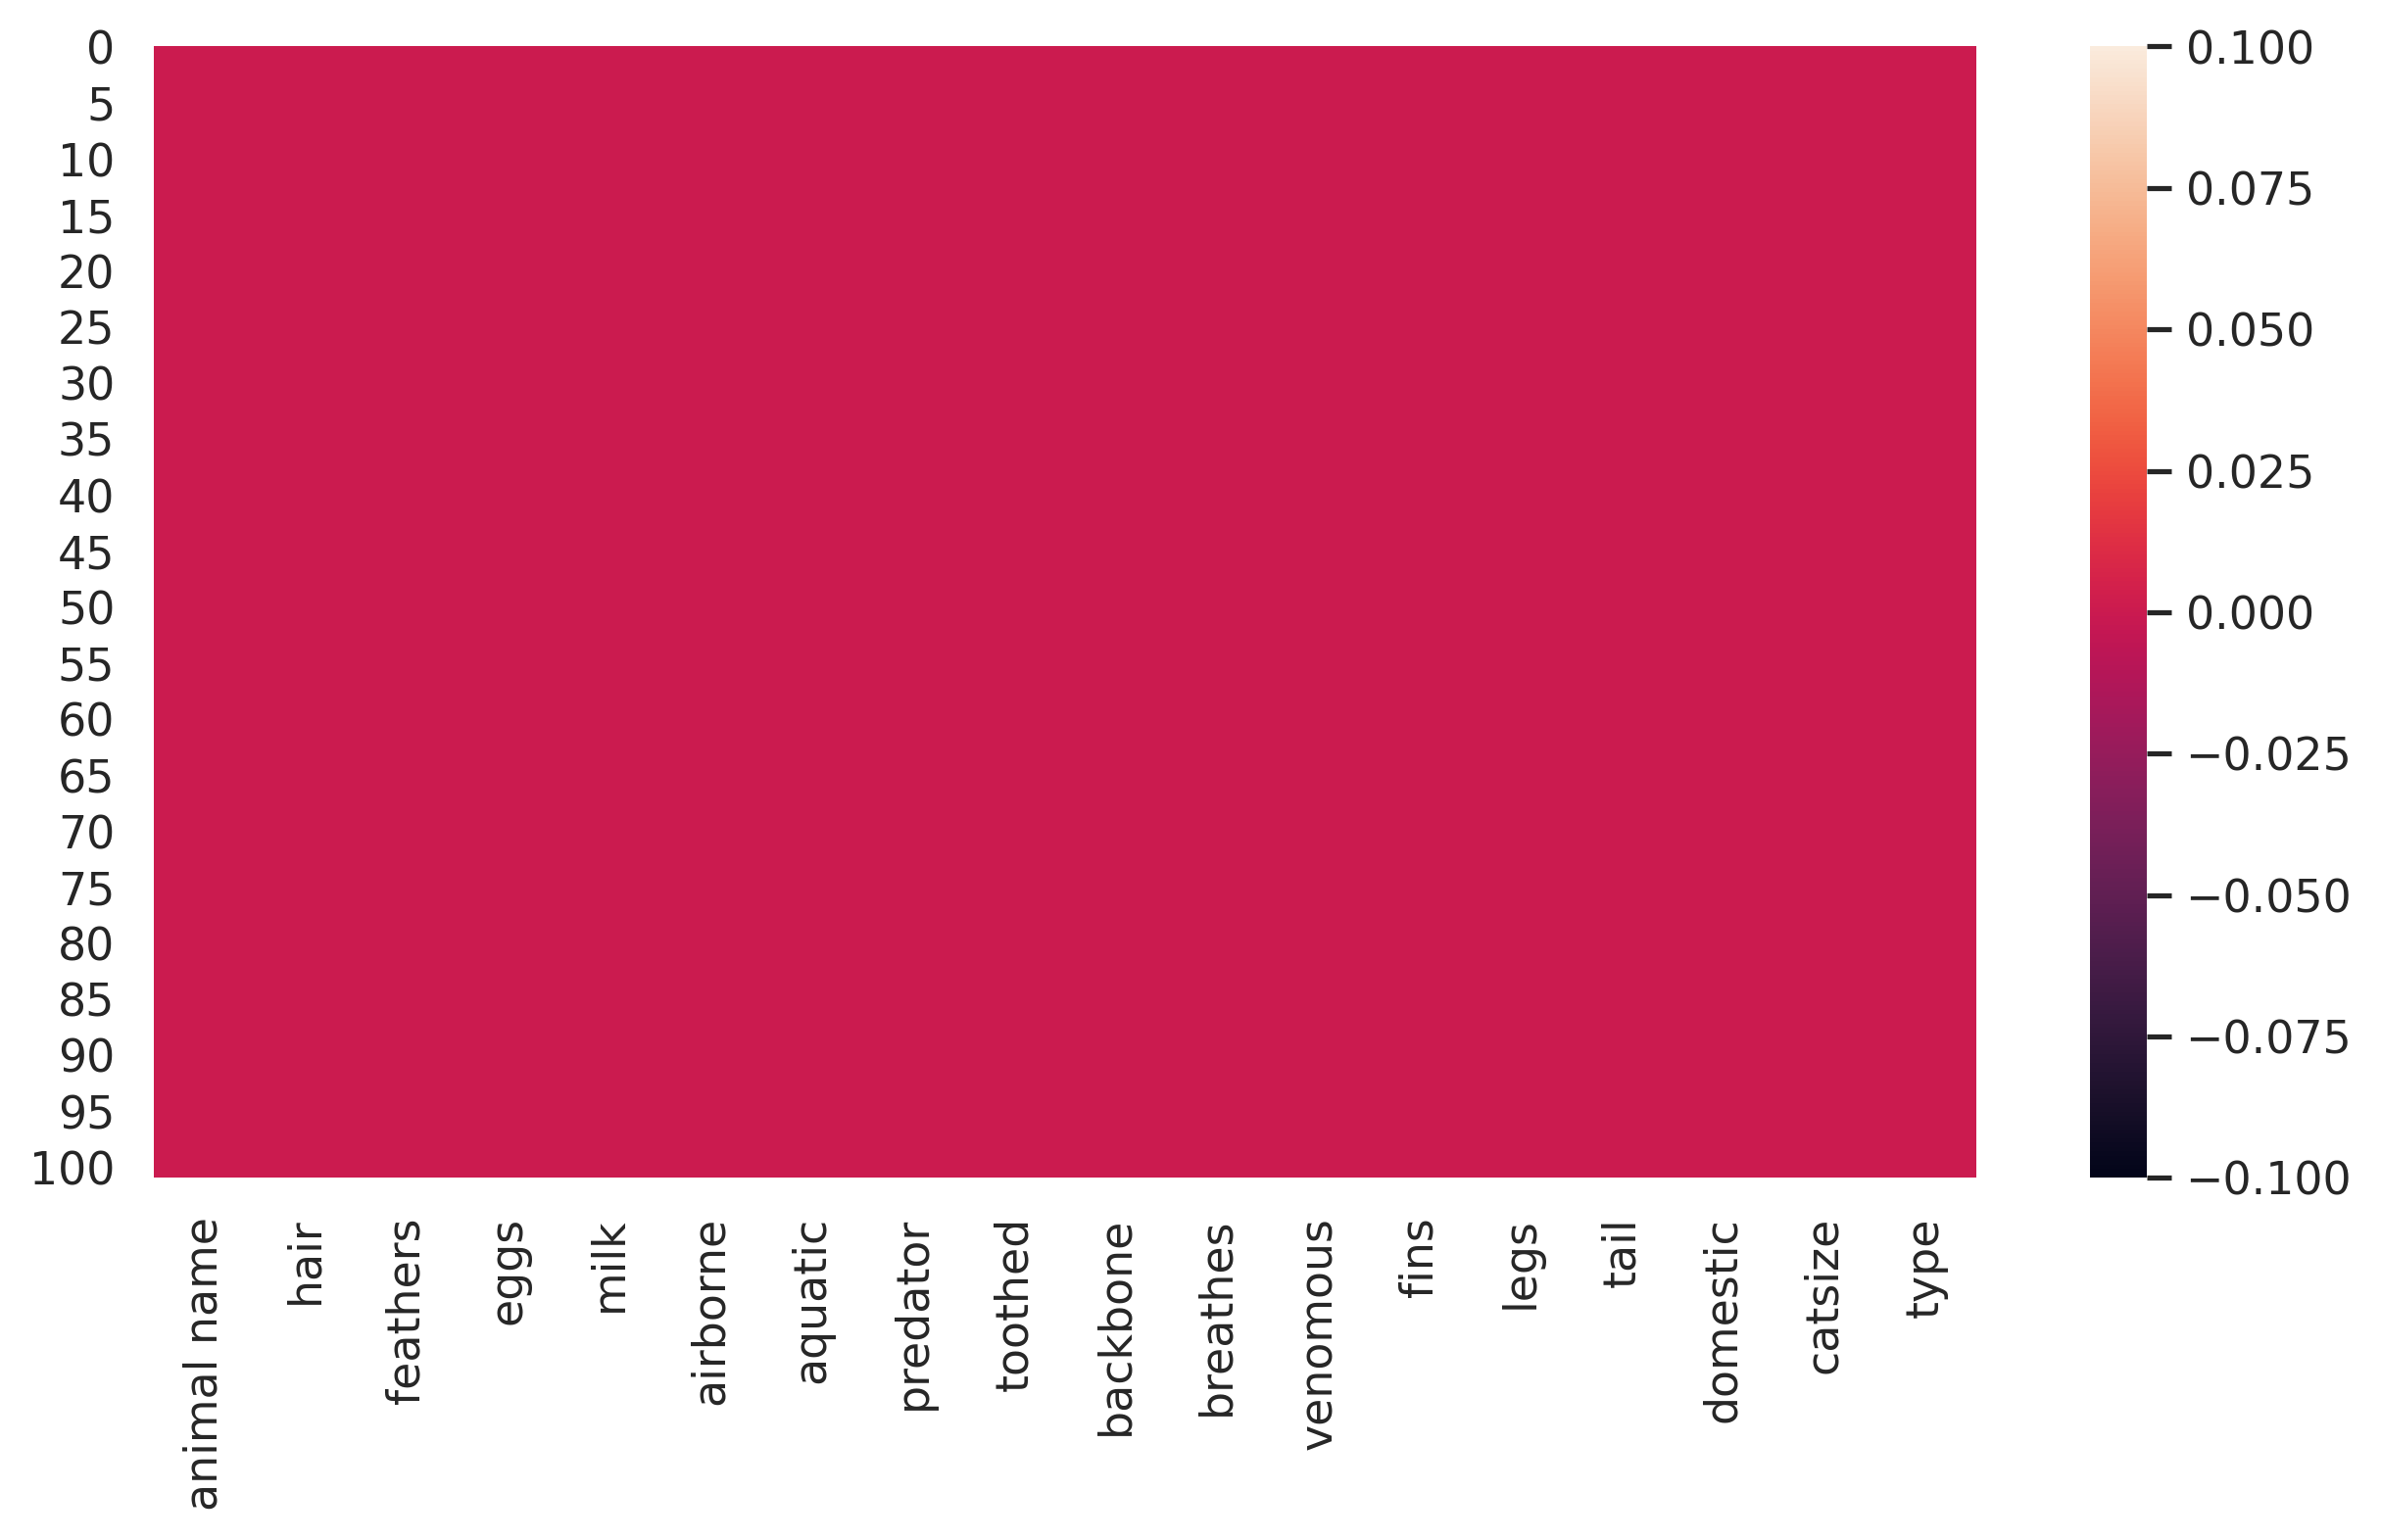

In [234]:
sns.heatmap(df2.isna())

In [235]:
df3 = df2.drop(columns ='animal name')
df3

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0
1,1,0,0,1,0,0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0
2,0,0,1,0,0,1,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,4.0
3,1,0,0,1,0,0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0
4,1,0,0,1,0,0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
97,1,0,1,0,1,0,1.0,1.0,1.0,1.0,1.0,1.0,6.0,1.0,1.0,1.0,6.0
98,1,0,0,1,0,0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0
99,0,0,1,0,0,0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,7.0


In [236]:
#Model Building

In [237]:
x = df3.iloc[:,:-1]
y = df3['legs']

In [238]:
#Feature Scaling

In [239]:
sc = StandardScaler()

In [240]:
x = sc.fit_transform(x)
x

array([[ 1.16139451, -0.49690399, -1.18522652, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.        ,
         0.        ,  0.        ],
       [-0.86103386, -0.49690399,  0.84372057, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.        ,
         0.        ,  0.        ],
       [-0.86103386, -0.49690399,  0.84372057, ...,  0.        ,
         0.        ,  0.        ],
       [-0.86103386,  2.01246118,  0.84372057, ...,  0.        ,
         0.        ,  0.        ]])

In [241]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [242]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)
ypred

array([4., 2., 4., 2., 4., 4., 4., 2., 4., 4., 2., 4., 4., 2., 4., 4., 4.,
       4., 4., 4., 2.])

In [243]:
knn.score(xtrain,ytrain),knn.score(xtest,ytest)

(0.9625, 0.9523809523809523)

In [244]:
#Hyperparameter Tunning for knn

In [245]:
trainac = []
testac = []

for i in range(1,25):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(xtrain,ytrain)
  trainac.append(knn.score(xtrain,ytrain))
  testac.append(knn.score(xtest,ytest))

In [246]:
trainac

[1.0,
 0.975,
 0.9625,
 0.95,
 0.925,
 0.925,
 0.925,
 0.925,
 0.875,
 0.875,
 0.875,
 0.875,
 0.875,
 0.85,
 0.8375,
 0.8375,
 0.8375,
 0.8375,
 0.8375,
 0.8375,
 0.7625,
 0.7625,
 0.7625,
 0.7625]

In [247]:
testac

[0.9523809523809523,
 0.9523809523809523,
 0.9523809523809523,
 0.9523809523809523,
 0.9523809523809523,
 0.9523809523809523,
 0.9523809523809523,
 0.9523809523809523,
 0.9523809523809523,
 0.9523809523809523,
 0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048]

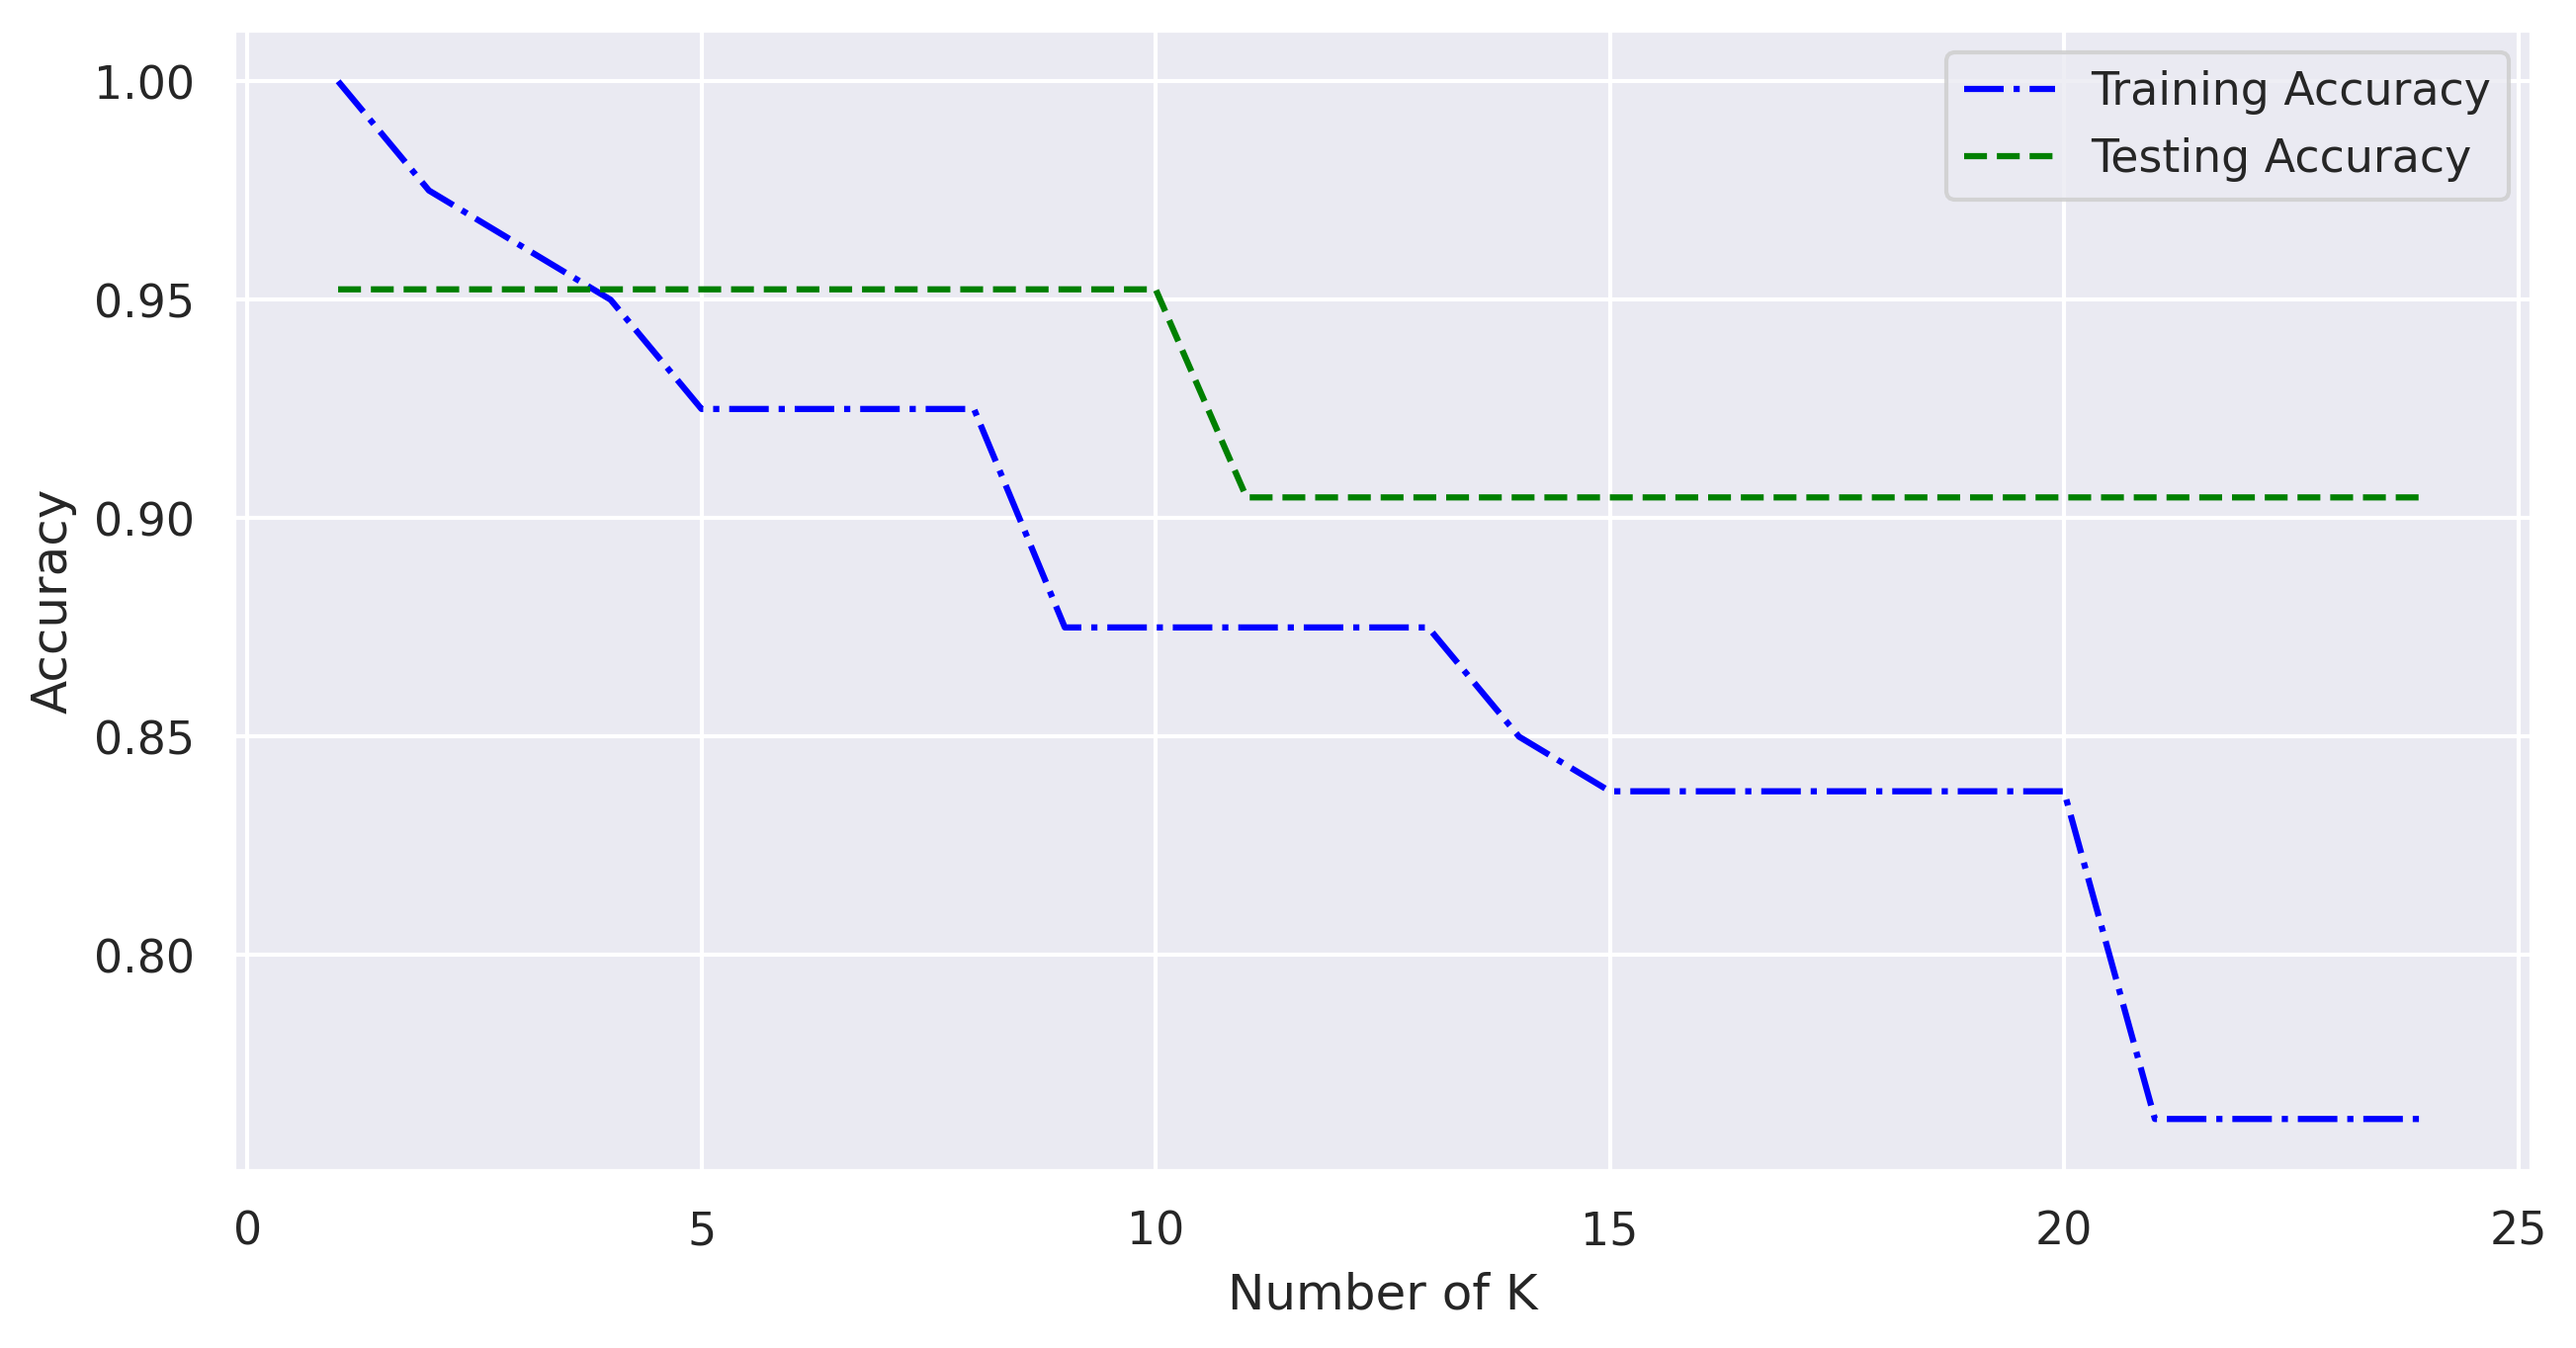

In [248]:
plt.plot(range(1,25),trainac, linestyle = '-.',color = 'blue',label = 'Training Accuracy')
plt.plot(range(1,25),testac, linestyle = '--',color = 'green',label = 'Testing Accuracy')
plt.xlabel('Number of K')
plt.ylabel('Accuracy')
plt.legend()

In [249]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(xtrain,ytrain)
knn.score(xtrain,ytrain),knn.score(xtest,ytest)

(0.875, 0.9047619047619048)